# Exercise: A polynomial-time separation oracle for the forest polytope

<font color='blue'><b>Goal:</b></font> Design and implement a separation oracle for the forest polytope.

Let $G=(V,E)$ be a graph. The *forest polytope* $P\subseteq\mathbb{R}^E$ associated with $G$ is the convex hull of all incidence vectors of forests of $G$. It can be written as

$$
P = \left\{ x\in \mathbb{R}^E_{\geq 0}\colon x(E[S]) \leq |S|-1 \text{ for all } S\subseteq V,\ S\neq \emptyset\right\}\enspace.
$$

Before we address the separation question, think about how to prove this fact!

<font color='blue'><b>Your first task:</b></font> How would you prove that the description of $P$ given above is correct? (This is not a coding exercise.)

*Write your answer here.*


---

## Reminder: Separation oracles

Recall that a separation oracle for $P$ is a procedure that, given a point $y\in\mathbb{R}^E$, decides if $y\in P$, and if not, finds a separating hyperplane for $y$.

Note that $y$ is not in $P$, then one of the constraints gives such a separating hyperplane, so it would be enough to check all constraints. However, in the forest polytope above, there are exponentially many constraints to check, which we cannot do directly in polynomial time. Thus, we need a more efficient procedure to do so.

What we can definitely do efficiently is to check whether one of the non-negativity constraints is violated - this just takes $O(n)$ time, looking at one coordinate after the other. The hard part is separating over the subtour elimination constraints $x(E[S]) \leq |S|-1$ for all non-empty $S\subset V$.

---

## Separating over subtour elimination constraints: Rewriting as a cut problem

A first idea could be to find a constraint that is "most violated", i.e., a set $S$ for which $|S|-1-y(E[S])$ is smallest. In other words, we would like to solve the problem

$$ (\star)\qquad \min \left\{ |S| - y(E[S]) \;\middle|\; S\subseteq V, S\neq \emptyset\right\}\enspace. $$

<font color='blue'><b>Your second task:</b></font> Prove that if the optimal value of $(\star)$ is at least $1$ and $y\geq 0$, then $y\in P$. Show how to obtain a separating hyperplane for $y$ from an optimal solution of $(\star)$ if the optimal value of $(\star)$ is less than $1$.

*Write your answer here.*


---

Our goal is to rewrite the problem $(\star)$ as (several) minimum cut problems. To this end, it is convenient to rewrite the objective function as follows.

<font color='blue'><b>Your third task:</b></font> Prove that for all $S\subseteq V$, we have

$$ y(E[S]) = \frac12 \sum_{v\in S} y(\delta(v)) - \frac12 y(\delta(S))\enspace, $$

and show that for any constant $\kappa$, the problem $(\star)$ has the same optimal solutions as

$$ (\star\star)\qquad \min \left\{ y(\delta(S)) + \sum_{v\in S} \big(2-y(\delta(v))\big) + \kappa \;\middle|\; S\subseteq V, S\neq \emptyset\right\}\enspace. $$

How can you decide that $y\in P$ or find a separating hyperplane from a solution of $(\star\star)$?

*Write your answer here.*


---

The problem $(\star\star)$ is somewhat close to a min-cut problem: The feasible sets are cuts in $G$ (except for the full set), and the first part $y(\delta(S))$ of the objective function is a cut function. Our first goal is to transform the problem into to a more standard minimum $s$-$t$ cut setting. To this end, we define an auxiliary digraph $H = (W,F)$, where $W = V \cup \{s,t\}$, and edge weights $w: F\to\mathbb{R}_{\geq 0}$. The goal is to define $F$ and $w$ such that for any $s$-$t$ cut $C\subseteq W$ in $H$, we have

$$ (\star\star\star) \underbrace{w(\delta_H^+(C))}_{\text{value of cut }C\text{ in }(H,w)}  =  \underbrace{y(\delta_G(C\setminus\{s\})) + \sum_{v\in C\setminus\{s\}} \big(2-y(\delta_G(v))\big)+\kappa}_{\text{value of }C\setminus\{s\}\text{as a solution of }(\star\star)} $$

for some constant $\kappa$.

<font color='blue'><b>Your fourth task:</b></font>
- What edges would you introduce in $F$ (and what weights $w$ would you assign to them) to get $w(\delta_H^+(C))=y(\delta_G(C\setminus\{s\})$ for all $C\subseteq W$ with $s\in C$ and $t\notin C$?
- What edges can you add to $F$ (and what weights $w$ would you assign to them) to get $w(\delta_H^+(C))=y(\delta_G(C\setminus\{s\}) + \sum_{v\in C\setminus\{s\}} \big(2-y(\delta_G(v))\big)+\kappa$ for some constant $\kappa$, i.e., to also get the second term of the desired objective, for all $C\subseteq W$ with $s\in C$ and $t\notin C$? What is the value of your constant $\kappa$?

*Write your answer here.*


---

Unfortunately, solving the mininum $s$-$t$ cut problem in the digraph $H$ you constructed above, will not help much: Most likely, you did not even introduce positive-weight edges exiting $s$, hence the cut $C=\{s\}$ will have value $w(\delta^+(C))=0$, i.e., it will be an optimal solution. But this optimal solution corresponds to the solution $S=C\setminus \{s\}=\emptyset$ of $(\star\star)$, which is infeasible. Thus, we want to modify $H$ once more to find the minimum $s$-$t$ cut different from $\{s\}$.

<font color='blue'><b>Your fifth task:</b></font> How can you ensure, by adding a weighted edge to $H$ (or changing the weight $w$ of an existing edge), that a given vertex $v\in V$ will always appear in a minimum $s$-$t$ cut in $H$, but guarantee that $(\star\star\star)$ still holds for all $s$-$t$ cuts $C\subseteq W$ that contain $v$? How can you exploit this to find the minimum $s$-$t$ cut different from $\{s\}$, and thus solve $(\star\star)$?

*Hint: You can solve linearly many minimum $s$-$t$ cut problems in (modifications of) $H$ to solve the last question.*

*Write your answer here.*


---

## Implementation

<font color='blue'><b>Your sixth task:</b></font> Implement a separation oracle for the forest polytope, based on the above results. The input for your function should be a `networkx` graph $G=(V,E)$ and a point $y$, given as a dictionary with the edges of $G$ as keys. If the point is not in the forest polytope, let it return a set of vertices corresponding to a violated constraint (note that if you return a set of two vertices, this could be the non-negativity constraint on the corresponding edge, or the subtour elimination constraint on that edge); if the point is in the forest polytope, the function should return `None`. Make sure you structure your code by, for example, writing separate functions for different subtasks!

In [2]:
def sum_neighbor(y, vertex):
    y_delta = 0
    for key in y.keys():
        if vertex in key:
            y_delta = y_delta + y[key]
    val = 2 - y_delta
    return val

In [3]:
# Implementation goes here

import networkx as nx
import math


def forestPolytopeSeparation(graph, point):
    
    G = graph
    y = point
    if any(value < 0 for key, value in y.items()):
        return key
    
    
    H = nx.DiGraph()
    for e in G.edges:
        u, v = e
        H.add_edge(u, v, weight=y[e])
        H.add_edge(v, u, weight=y[e])
    wei = nx.get_edge_attributes(H, 'weight')
    for v in G.nodes:
        H.add_edge('s', v, weight=0)
        H.add_edge(v, 't', weight=sum_neighbor(y, v))
    wei = nx.get_edge_attributes(H, 'weight')
    
    val = []
    partition = []
    for i, v in enumerate(G.nodes):
        H_new = H.copy()
        H_new.edges[('s', v)]['weight'] = math.inf
        val_i, partition_i = nx.minimum_cut(H_new, 's', 't', capacity='weight')
        val.append(val_i)
        partition.append(partition_i)
    
    min_val = min(val)
    
    if min_val < 2:
        index_min_val = val.index(min_val)
        return partition[index_min_val][0] - {'s'}
    
    return None

---

## Testing the implementation
Test your implementation on the input given below and check from the picture what went wrong if the point is not in the forest polytope of the generated graph (note that you'll have to run the bottom cell first, where the function for displaying the graph and a set of vertices leading to a violated constraint is defined). You can also play with the paramters used, as well as with the distribution from wich the edge weights are generated.

Point is not in the forest polytope, violated constraint obtained from {1, 2, 3}


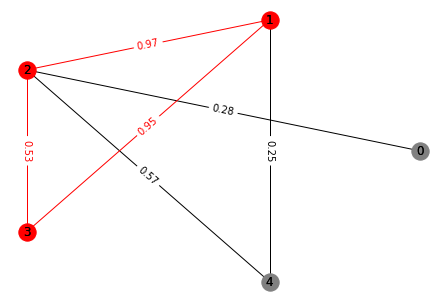

In [13]:
## Testing
# number of nodes
n = 5
# edge appearance probability for random graph
p = 0.7

# generate random graph
graph = nx.gnp_random_graph(n, p)
# create a random solution point in R^E
import random
point = dict((e, (max(1,4/(p*n))+1/(20*n))*random.random()-1/(40*n)) for e in graph.edges)

# solve separation problem problem
S = forestPolytopeSeparation(graph, point)

# check results
if S == None:
    print("Point is in the forest polytope.")
    draw_point(graph, point)
else:
    print(f"Point is not in the forest polytope, violated constraint obtained from {S}")
    draw_point(graph, point, S)

In [5]:
## helper function for drawing a point (and a subset of vertices with its induced edges)

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

def draw_point(graph, point, node_subset = set()):
    
    # node positions
    node_pos = nx.circular_layout(graph)
    
    other_nodes = set(graph.nodes) - set(node_subset)
    blue_edges = [edge for edge in graph.edges if set(edge).issubset(node_subset)]
    black_edges = [edge for edge in graph.edges if edge not in blue_edges]
    blue_edge_labels = {edge: round(point[edge], 2) for edge in blue_edges}
    black_edge_labels = {edge: round(point[edge], 2) for edge in black_edges}

    # Draw nodes
    nx.draw(graph, edgelist = [], node_color = "red", nodelist = node_subset,
            pos = node_pos, with_labels = True)
    nx.draw(graph, edgelist = [], node_color = "gray", nodelist = other_nodes,
            pos = node_pos, with_labels = True)

    # Draw edges
    nx.draw_networkx_edges(graph, edge_color = "black",
                           edgelist = black_edges, pos = node_pos)
    nx.draw_networkx_edges(graph, edge_color = "red",
                           edgelist = blue_edges, pos = node_pos)

    # Draw edge labels
    nx.draw_networkx_edge_labels(graph, font_color = "black",
                                 edge_labels = black_edge_labels, pos = node_pos)
    nx.draw_networkx_edge_labels(graph, font_color = "red",
                                 edge_labels = blue_edge_labels, pos = node_pos)

    # Show drawing
    plt.show()